Chapter 4. From Linear Regression to Logistic Regression
=========================================================

#### 발표자: 김덕태 (2015-08-31)

#### generalized linear model
- a flexible framework that requires fewer assumptions than ordinary linear regression
- special cases of generalized linear model
  - simple linear regression
  - multiple linear regression
  - polynomial regression
  - logistic regression

#### logistic regression
- used for classification tasks
- goal in classification tasks
  - find a function that maps an observation to its associated class or label

#### A learning algorithm
- use pairs of feature vectors and their corresponding labels to induce the values of the mapping function's parameters
- produce the best classifier
- measured by a particular performance metric

#### binary classification
- the classifier must assign instances to one of the two classes

#### multiclass classification
- the classifier must assign one of several labels to each instance

#### multilabel classification
- the classifier must assign a subset of the labels to each instance



# Binary classification with logistic regression

#### normal distribution(also known as the Gaussian distribution or bell curve)
- ordinary linear regression assumes that the response variable is normally distributed
- Normally distributed data is symmetrical
  - half of the values are greater than the mean and the other half of the values are less than the mean.
- The mean, median, and mode of normally distributed data are also equal
- Many natural phenomena approximately follow normal distributions.
  - Ex) the height of people


#### Bernoulli distribution
- In some problems the response variable is not normally distributed.
  - Ex) a coin toss can result in two outcomes: heads or tails
- The probability distribution of a random variable that can take the positive case with probability P or the negative case with probability 1-P.
- If the response variable represents a probability, it must be constrained to the range {0,1}
- Linear regression assumes that a constant change in the value of an explanatory variable results in a constant change in the value of the response variable, an assumption that does not hold if the value of the response variable represents a probability

- Generalized linear models remove this assumption by relating a linear combination of the explanatory variables to the response variable using a link function
- ordinary linear regression is a special case of the generalized linear model that relates a linear combination of the explanatory variables to a normally distributed response variable using the identity link function
- We can use a different link function to relate a linear combination of the explanatory variables to the response variable that is not normally distributed.

#### logistic regression
- response variable describes the probability that the outcome is the positive case
- If the response variable is equal to or exceeds a discrimination threshold, the positive class is predicted
- otherwise, the negative class is predicted

#### logistic function

![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

- The response variable is modeled as a function of a linear combination of the explanatory variables using the logistic function
- logistic function
$$\sigma(t) = \frac{e^t}{e^t + 1} = {1 \over 1 + e^{-t}}$$
- another form of logistic function
  - t: a linear combination of explanatory variables ($\beta_0 + \beta_1 x$)
$$F(x) = {1 \over 1 + e^{-(\beta_0 + \beta_1 x)}}$$
  
#### logit function
- inverse of logistic function
- formula
$$ g(x) =  ln {x \over 1-x}$$
$$ g(F(x)) =  ln {F(x) \over 1-F(x)} = \beta_0 + \beta_1 x$$



# Spam filtering
- modern version of the canonical binary classification problem
- classify spam and ham SMS messages
- some predictions using scikit-learn's LogisticRegression class

#### data set
- SMS Spam Classification Data Set from the UCI Machine Learning Repository
  - http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

#### explore the data set and calculate some basic summary statistics using pandas

In [3]:
import pandas as pd
df = pd.read_csv('data/SMSSpamCollection', delimiter='\t', header=None)
print(df.head())


      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


- A binary label and a text message comprise each row
- 5,574 ham SMS messages
  - 4,827 real ham 
  - 747 spam

#### Preparation of training and test data 
- load the .csv file using pandas
- split the data set into training and test sets
- train_test_split()
  - assigns 75 percent of the samples to the training set and allocates the remaining 25 percent of the samples to the test set



In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

df = pd.read_csv('data/SMSSpamCollection', delimiter='\t', header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

#### extract TF-IDF features
- TF-IDF: the product of its term frequency and inverse document frequency
- TfidfVectorizer combines CountVectorizer and TfidfTransformer
- fit it with the training messages, and transform both the training and test messages


In [2]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

#### use LogisticRegression class
- create an instance of LogisticRegression and train our model

In [3]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:5]):
    print('Prediction: %s. Message: %s' % (prediction, X_test_raw[i]))


Prediction: ham. Message: Hi juan. Im coming home on fri hey. Of course i expect a welcome party and lots of presents. Ill phone u when i get back. Loads of love nicky x x x x x x x x x
Prediction: ham. Message: Jason says it's cool if we pick some up from his place in like an hour
Prediction: ham. Message: Can not use foreign stamps in this country.
Prediction: ham. Message: Night has ended for another day, morning has come in a special way. May you smile like the sunny rays and leaves your worries at the blue blue bay. Gud mrng
Prediction: ham. Message: Ma head dey swell oh. Thanks for making my day


# Binary classification performance metrics

#### metrics
- accuracy
- precision, recall
- F1 measure
- ROC AUC score

#### basis for metrics
- concepts of true positives, true negatives, false positives, and false negatives
  - Positive and negative refer to the predicted classes
  - True and false denote whether the predicted class is the same as the true class.
- Ex)
  - a true negative prediction: the classifier correctly predicts that a message is ham.
  - a false positive prediction: A prediction that a ham message is spam
  - a false negative prediction: a spam message incorrectly classified as ham

#### A confusion matrix(or contingency table)
- visualize true and false positives and negative

|         | Negative | Positive
|---------|:--------:|:-------:
|Negative | TN       | FP     
|Positive | FN       | TP     




[[4 1]
 [2 3]]


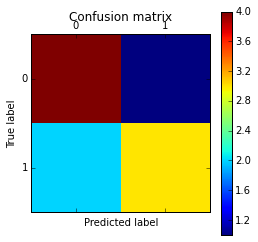

In [4]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Accuracy
- measures a fraction of the classifier's predictions that are correct
- accuracy_score() function
  - calculate the accuracy of a set of predictions given the correct labels


In [5]:
from sklearn.metrics import accuracy_score
y_pred, y_true = [0, 1, 1, 0], [1, 1, 1, 1]
print 'Accuracy:', accuracy_score(y_true, y_pred)

Accuracy: 0.5


- cross_val_score() function
  - predicts and scores labels for a test set using accuracy
  - accuracy may differ as the training and test sets are assigned randomly.


In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
df = pd.read_csv('data/SMSSpamCollection', delimiter='\t', header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(np.mean(scores), scores)

(0.95596992395138047, array([ 0.94504182,  0.96774194,  0.9497006 ,  0.96047904,  0.95688623]))


- measures the overall correctness of the classifier
- does not distinguish between false positive errors and false negative errors.
- 장점
  - 전반적인 예측 정확도 평가 방법.
  - postive 예측율이나 negative 예측율에 대한 편향성이 없다.
- 단점
  - 실제 분류에서 positive와 negative의 비율의 차이가 크면 accuracy가 높아도 의미가 없다. 무조건 비율이 큰 쪽으로만 예측하는 경우 accuracy가 높아지기 때문이다.



## Precision and recall
- positive와 negative의 가치가 다를 때 accuracy 대신 사용
- Some applications may be more sensitive to false negatives than false positives, or vice versa
  - Ex) To promote customer satisfaction, the credit card company may prefer to risk verifying legitimate transactions than risk ignoring a fraudulent transaction.
  - classifiers are often evaluated using two additional measures called precision and recall.

#### precision
- fraction of positive predictions that are correct
- classifier가 positive라고 분류한 것중에서 실제로 맞는 비율 
$$ P = {TP \over TP + FP}$$

|         | Negative | Positive
|---------|:--------:|:-------:
|Negative | TN       | FP     
|Positive | FN       | TP     
- 장점
  - positive로 예측한 것 중에서 맞춘 비율(혹은, 틀린 비율)이 중요할 때 사용
    - 예) 부작용이 큰 수술을 하기 위한 진단
- 단점
  - positive에 대한 편향성
    - postive 예측율만을 다루고 negative 예측율은 무시한다.
    - positive만 중요힌 경우에 사용
    - negative를 positive로 간주하여 추가 지표로 사용할 수도 있음
  - 보수(conservative) 편향성
    - classifier가 positive임이 확실한 경우에만 positive로 분류하는 보수(conservative) 성향인 경우 precision은 높지만 recall이 낮아진다.
    - 가령, positive임이 아주 확실한 1개만 positive로 분류하고 나머지의 경우 모두 negative로 분류하면 precision은 100%이나 recall은 0에 근접하고 정확도는 떨어진다.

#### recall
- fraction of the truly positive instances that the classifier recognizes
- 실제로 positive인 것 중에서 맞게 분류한 비율
- Sometimes called sensitivity in medical domains
 $$ R = {TP \over TP + FN}$$

|         | Negative | Positive
|---------|:--------:|:-------:
|Negative | TN       | FP     
|Positive | FN       | TP     
- 장점
  - 실제 positive인 것 중에서 맞춘 비율이 중요할 때 사용
    - 예) 수술을 하지 않으면 위험한 질병에 대한 진단
- 단점
  - positive에 대한 편향성
    - positive 예측율만을 다루고 negative 예측율은 무시한다.
    - positive만 중요한 경우에 사용
    - negative를 positive로 간주하여 추가 지표로 사용할 수도 있음
  - 진보(liberal) 편향성
    - classifier가 positive로 많이 분류하는 진보(liberal) 성향인 경우 recall은 높지만 precision은 낮아진다.
    - 가령, 모든 경우에 positive라고 예측하면 recall은 100%이나 precision은 크게 떨어지고 정확도도 떨어진다


#### cross_val_score() function calculate precision and recall

In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
df = pd.read_csv('data/SMSSpamCollection', delimiter='\t', header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
lb = LabelBinarizer()
print(y_train)
print(lb.fit_transform(y_train))
y_train2 = np.array([number[0] for number in lb.fit_transform(y_train)])
classifier = LogisticRegression()
classifier.fit(X_train, y_train2)
precisions = cross_val_score(classifier, X_train, y_train2, cv=5, scoring='precision')
print('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, y_train2, cv=5, scoring='recall')
print('Recalls', np.mean(recalls), recalls)


['ham' 'spam' 'ham' ..., 'ham' 'spam' 'ham']
[[0]
 [1]
 [0]
 ..., 
 [0]
 [1]
 [0]]
('Precision', 0.99002164502164514, array([ 1.        ,  1.        ,  0.975     ,  0.98701299,  0.98809524]))
('Recalls', 0.6660869565217391, array([ 0.67826087,  0.59130435,  0.67826087,  0.66086957,  0.72173913]))


- Our classifier's precision is 0.992
- almost all of the messages that it predicted as spam were actually spam
- Its recall is lower, indicating that it incorrectly classified approximately 22 percent of the spam messages as ham
- Evaluation (DT)
  - 이 spam filter는 precision이 매우 높으나 recall이 낮은 편이다.
  - 즉, spam이 아닌 것을 spam이라고 한 경우는 드물지만(약 1%) spam인데 spam이 아니라고 한 비율(약 30%)이 높은 편이다.


# Calculating the F1 measure

- also called f-measure, f-score
- harmonic mean, or weighted average, of the precision and recall scores.

$$F1 = \frac{1}{\frac{\frac{1}{P} + \frac{1}{R}}{2}} = 2 \frac{PR}{P+R}$$

|         | Negative | Positive
|---------|:--------:|:-------:
|Negative | TN       | FP     
|Positive | FN       | TP     

- $\displaystyle F_\beta = (1 + \beta^2) \frac{PR}{\beta^2 P + R}$
  - F0.5: favor precision over recall 
  - F2: favor recall over precision
- penalizes classifiers with imbalanced precision and recall scores
- P와 R이 비슷한 값일 경우 그 값의 평균(즉, P 혹은 R)에 근접한다.
- F1 값은 2 min(P, R)보다 항상 작다.
- F1 값은 P나 R 한 쪽이 다른 한쪽보다 휠씬 더 작은 값일 경우 2 min(P, R)에 근접한다.
- 따라서, F1 값이 큰 값이 되기 위해서는 P와 R이 골고루 커야 한다.
- 총 자원이 제한된 경우 (P + R = c), 최대 조화평균값은 x = y = c/2인 경우이다. 
- accuracy가 1인 것, precision과 recall이 동시에 1인 것, F1이 1인 것은 동치이다.
- F1이 크면 accuracy도 높다.
  - TP에 비해 FP와 FN이 모두 작으므로 accuracy가 높다.
- 장점
  - precision, recall 중립성
      - precision과 recall이 모두 중요할 때 사용
      - F1은 precision과 recall이 모두 커야 큰 값이 될 수 있다.
  - accuracy와 달리 실제 positive, negative의 비율의 차가 큰 경우에도 measure가 왜곡되지 않는다.
      - negative가 매우 크고(99%), negative는 모두 맞추고, 실제 positive(1%)중에서 10%만을 맞추고 모두 negative로 예측하면, TN = 99%, FN = 0.9%, TP = 0.1%, FP = 0%. 따라서, accuracy는 0.991, precision은 1, recall은 0.1, F1은 0.182
- 단점
  - positive에 대한 편향성
      - positive 예측율만을 다루고 negative 예측율은 무시한다.
      - positive만 중요한 경우에 사용
      - negative를 positive로 간주하여 추가 지표로 사용할 수도 있음
      - negative가 중요하거나 둘다 중요한 경우, F1은 positive로 편향된다.
          - 실제 negative의 비율이 작은 경우(1%), positive는 모두 맞추고, negative 중에서 10%만 맞춘 경우(즉, TP = 99%, FN = 0%, TN = 0.1%, FP = 0.9%), accuracy는 0.991, precision은 0.991, recall은 1, F1은 0.995
          - negative가 중요한 경우 적절한 평가값인 negative recall은 0.1이다.
- DT Question
  - positive F1과 negative F1의 조화 평균이 필요한 경우는 없는가?"


#### 산술평균과 조화평균
- 산술평균
  - $\displaystyle \frac{x + y}{2}$
  - 평균이므로 x, y 둘다 커지거나 어느 한쪽만 커져도 평균은 지속적으로 커진다.
  - 총 자원이 제한된 경우 (x + y = c), 자원을 어떠한 비율의 x와 y로 분배하든 평균은 일정하다.
- 조화평균
  - $\displaystyle \frac{1}{\frac{\frac{1}{x} + \frac{1}{y}}{2}} = 2 \frac{xy}{x+y} = 2 \frac{x}{1+x/y} = 2 \frac{y}{1+y/x}$
  - 대표적인 예: 평균 속력 (시간당 거리 단위를 거리당 시간 단위로 바꿔서 평균한 후 역수를 취하여 시간당 거리, 즉 속력을 구한다.)
  - 평균이므로 x, y 둘다 커지거나 어느 한쪽만 커져도 평균은 지속적으로 커진다.
  - x와 y가 비슷한 값일 경우 그 값의 평균(즉, x 혹은 y)에 근접한다.
  - x나 y 한 쪽이 다른 한쪽보다 휠씬 더 작은 값일 경우 그 작은 값의 2배에 근접한다.
  - x가 커지면 그 값은 2y에 수렴하나 2y보다 항상 작다.
  - y가 커지면 그 값은 2x에 수렴하나 2x보다 항상 작다.
  - 총 자원이 제한된 경우 (x + y = c), 최대 조화평균값은 x = y = c/2인 경우이다. 
$$\frac{1}{\frac{\frac{1}{x} + \frac{1}{y}}{2}} = 2 \frac{xy}{x+y} = 2 \frac{x (c-x)}{x + c - x} = \frac{2}{c}(cx - x^2)$$
$$c - 2x = 0$$
$$x = \frac{c}{2}, y = \frac{c}{2}$$


In [8]:
f1s = cross_val_score(classifier, X_train, y_train2, cv=5, scoring='f1')
print('F1', np.mean(f1s), f1s)

('F1', 0.79545941505710827, array([ 0.80829016,  0.7431694 ,  0.8       ,  0.79166667,  0.83417085]))


- F1: 0.78
- arithmetic mean: 0.815


# ROC AUC
- ROC (Receiver Operating Characteristic) curve
  - a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied
  - plot the classifier's recall(TPR, true positive rate) against its fall-out (FPR, false postive rate)
  - fall-out 
  $$ F = \frac{FP}{TN + FP} = 1 - \frac{TN}{TN + FP} $$
      - number of false positives divided by the total number of negatives
      - 실제 negative 중에서 틀린 비율
- AUC (Area under the ROC curve)
  - reduces the ROC curve to a single value, which represents the expected performance of the classifier.
  - The dashed line is for a classifier that predicts classes randomly
![](roc.png)
- DT ROC curve
  - ROC curve보다 의미가 더 간결하고 명확하다.
  - Recall: positive 중에서 맞춘 비율
  - Negative Recall: negative 중에서 맞춘 비율
  - 둘다 클수록 좋다.


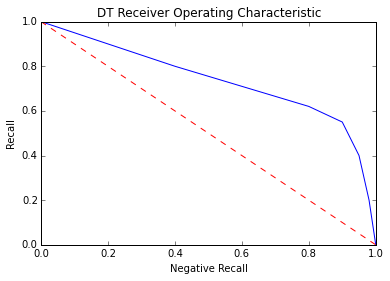

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('DT Receiver Operating Characteristic')
negative_recall = [1, 0.98, 0.95, 0.9, 0.8, 0.4, 0]
recall = [0, 0.2, 0.4, 0.55, 0.62, 0.8, 1]
plt.plot(negative_recall, recall)
plt.plot([0, 1], [1, 0], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Negative Recall')
plt.show()


- 구분 능력이 없는 순수한 random 예측인 경우
  - 대각선은 구분 능력 없이 일정한 확률 p로 positive로 예측하는 경우 reall과 fall-out이 모두 p임을 의미함
- 실제 negative 중에서 틀린 비율과 실제 positive 중에서 맞춘 비율을 분류 기준(logistic regression에 의한 확률의 threshold 값)에 따라 각각 x, y축 좌표로 표시
  - test data에 대하여 logistic regression에 의해 예측한 확률 분포가 동일하더라도 분류 기준에 따라 ROC curve상의 TPR, FPR(fall-out)이 달라짐
      - 보수적(conservative) 기준 (threshold 값이 크다)
          - Postive임이 확실한 경우에만 Positive로 분류하고 나머지는 Negaive로 분류함
      - 진보적(liberal) 기준 (threshold 값이 작다)
          - Postive임이 불확실하지만 가능성이 있어보이면 무조건 Positive로 분류하고 나머지는 Negaive로 분류함
      - 중립적(neutral) 기준 (threshold 값이 적정하다)
          - 적정 확률 수준에서 Positive와 Negative를 분류한다.
- 가능하면 recall은 높되, fall-out은 낮은 값이 좋다. (좌표의 상단 왼쪽편)
- 가장 뛰어난 예측 능력을 가진 classifier의 ROC curve
  - positive data에 대하여 1의 확률로, negative data에 대하여 0의 확률로 예측하는 것이다.
  - 이 경우, ROC Curve는 좌표점 (0,1)이다.
- AUC가 1인 완전 예측 classifier의 ROC curve
  - 특정 확률 p(0.5 등)에 대하여 그 이상의 확률이면 실제 데이터가 positive이고, 그 미만이면 실제 데이터가 negative인 경우이다.
  - threshold가 특정 확률 p보다 점점 크게 하면, fall-out은 0이고, recall은 점점 작아진다. (좌표의 recall 축)
  - threshold가 특정 확률 p보다 점점 작게 하면, recall은 1이고, fall-out은 점점 커진다. (좌표의 상단 수평선)
  - AUC가 1이라는 것은 무조건 완전한 예측(positive와 negative를 모두 완전히 예측)을 한다는 것이 아니라 적정 threshold 값을 찾으면 완전한 예측을 할 수 있음을 의미함.
- 장점
  - positive에 대한 편향성이 없다.
      - positive recall과 negative recall을 동등하게 표시한다.
      - positve와 negative 비율의 차이가 커도 ROC curve는 영향을 받지 않는다. (accuracy, precision, recall, f-measure는 영향을 크게 받을 수 있다)
  - 포괄적 분류 기준
      - 주관적 분류 기준과 관계없이 내부적인 구분 능력(예측된 확률)을 나타낸다.
      - unlike precision and recall, the ROC curve illustrates the classifier's performance for all values of the discrimination threshold
      - 목적에 따라 원하는 수준의 recall과 fall-out 값에 해당하는 threshold 값을 사용할 수도 있다.
- 단점
  - precision, recall 요소를 포함하지 않는다.
  - 특정 threshold 확률에 대하여 완전한 예측이 가능하기만 하면(즉, AUC가 1) 얼마나 더 적정한 확률로 예측했는지를 변별하지는 못한다. 가령 threshold가 0.5인 경우와 0.99인 경우를 구분하지 않는다.


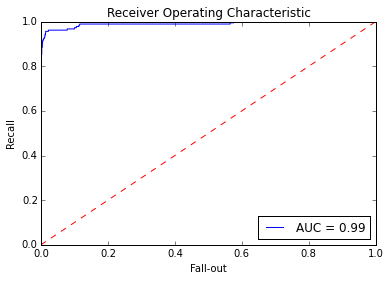

[0 0 0 ..., 0 1 0]
[ 0.03919853  0.0401668   0.03758962 ...,  0.05738717  0.89730153
  0.04664608]
[ 0.          0.          0.         ...,  0.99834711  0.99917355  1.        ]
[ 0.00546448  0.01092896  0.01639344 ...,  1.          1.          1.        ]
[ 0.97599692  0.97542541  0.96781251 ...,  0.00508785  0.00473233
  0.00411287]


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
df = pd.read_csv('data/SMSSpamCollection', delimiter='\t', header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
lb = LabelBinarizer()
y_train2 = np.array([number[0] for number in lb.fit_transform(y_train)])
y_test2 = np.array([number[0] for number in lb.fit_transform(y_test)])
classifier = LogisticRegression()
classifier.fit(X_train, y_train2)
predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test2, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

print(y_test2)
print(predictions[:,1])
print(false_positive_rate)
print(recall)
print(thresholds)




- DT Conclusion
  - 의미상 더 포괄적인 ML metric들이 있으나 다른 ML metrics를 완전히 대신할 수는 없다.
  - 용도에 맞는 metric(accuracy, precision, recall, f-measure, ROC, AUC 등)을 1개 혹은 여러개 선택하여 사용한다.
  - 혹은, 실제 가치를 이들 metric의 function으로 정의하여 사용한다.


# Tuning models with grid search
- Hyperparameters are parameters of the model that are not learned
- Hyperparameters of the logistic regression SMS classifier
  - the value of the regularization term
  - thresholds used to remove words that appear too frequently or infrequently
  - In scikit-learn, hyperparameters are set through the model's constructor
- Grid search
  - a common method to select the hyperparameter values that produce the best model.
  - an exhaustive search that trains and evaluates a model for each possible combination of the hyperparameter values supplied by the developer
  - Computationally costly for even small sets of hyperparameter values
  - embarrassingly parallel problem
- GridSearchCV() function in scikit-learn


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, 10000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
#   'vect__use_idf': (True, False),
#   'vect__norm': ('l1', 'l2'),
    'clf__penalty': ('l1', 'l2'),
#    'clf__C': (0.01, 0.1, 1, 10),
}


grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
df = pd.read_csv('data/SMSSpamCollection', delimiter='\t', header=None)
X, y, = df[1], df[0]
X_train, X_test, y_train, y_test = train_test_split(X, y)
lb = LabelBinarizer()
y_train2 = np.array([number[0] for number in lb.fit_transform(y_train)])
y_test2 = np.array([number[0] for number in lb.fit_transform(y_test)])
grid_search.fit(X_train, y_train2)
print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test2, predictions)
print 'Precision:', precision_score(y_test2, predictions)
print 'Recall:', recall_score(y_test2, predictions)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 200 jobs       | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 274 out of 288 | elapsed:   14.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   14.8s finished


Best score: 0.966
Best parameters set:
	clf__penalty: 'l2'
	vect__max_df: 0.25
	vect__max_features: 2500
	vect__ngram_range: (1, 2)
	vect__stop_words: None
Accuracy: 0.977027997128
Precision: 1.0
Recall: 0.835051546392


# Multi-class classification
- scikit-learn uses a strategy called
  - one-vs.-all
      - uses one binary classifier for each of the possible classes
      - The class that is predicted with the greatest confidence is assigned to the instance.
      - LogisticRegression supports multi-class classification using the one-versus-all strategy out of the box.
  - one-vs.-the-rest

#### Example) classify the sentiments of phrases taken from movie reviews in the Rotten Tomatoes data set
- Data Download: http://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data


In [8]:
import pandas as pd
df = pd.read_csv('movie-reviews/train.tsv', header=0, delimiter='\t')
print df.count()

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64


In [9]:
print df.head()

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


- The Sentiment column contains the response variables.
  - 0: the sentiment negative
  - 1: somewhat negative
  - and so on. 


In [10]:
print df['Phrase'].head(10)

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object


In [11]:
print df['Sentiment'].describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64


In [12]:
print df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
dtype: int64


In [13]:
print df['Sentiment'].value_counts()/df['Sentiment'].count()

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
dtype: float64


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
    'vect__max_df': (0.25, 0.5),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10),
}
df = pd.read_csv('movie-reviews/train.tsv', header=0, delimiter='\t')
X, y = df['Phrase'], df['Sentiment'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
grid_search = GridSearchCV(pipeline, parameters, n_jobs=3, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Done   1 jobs       | elapsed:    2.2s
[Parallel(n_jobs=3)]: Done  50 jobs       | elapsed:   51.0s
[Parallel(n_jobs=3)]: Done  68 out of  72 | elapsed:  1.3min remaining:    4.8s
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:  1.5min finished


Best score: 0.624
Best parameters set:
	clf__C: 10
	vect__max_df: 0.25
	vect__ngram_range: (1, 2)
	vect__use_idf: False


## Multi-class classification performance metrics
- confusion matrices
- Accuracy Precision, recall, and F1 score can be computed for each of the classes


In [16]:
predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)
print 'Confusion Matrix:', confusion_matrix(y_test, predictions)
print 'Classification Report:', classification_report(y_test, predictions)
print df['Sentiment'].as_matrix()

Accuracy: 0.639305395361
Confusion Matrix: [[ 1134  1693   676    55     2]
 [  907  6020  6019   558    20]
 [  223  3147 32775  3545   173]
 [   30   419  6350  8267  1373]
 [    4    35   464  2452  1689]]
Classification Report:              precision    recall  f1-score   support

          0       0.49      0.32      0.39      3560
          1       0.53      0.45      0.48     13524
          2       0.71      0.82      0.76     39863
          3       0.56      0.50      0.53     16439
          4       0.52      0.36      0.43      4644

avg / total       0.62      0.64      0.63     78030

[1 2 2 ..., 3 2 2]


# Multi-label classification and problem transformation
- two groups of approaches for multi-label classification.
![](multi-label.png)

#### Problem transformation methods
- cast the original multi-label problem as a set of single-label classification problems

#### The first problem transformation method
- The multi-label classification problem that had five classes is now a multi-class classification problem with seven classes
![](multi-label-first.png)

#### The seond problem transformation method
- Train one binary classifier for each of the labels in the training set
- Each classifier predicts whether or not the instance belongs to one label.
![](multi-label-second.png)
## Multi-label classification performance metrics
- Hamming loss
  - average fraction of incorrect labels
  -  perfect score is zero
  - accuracy와 유사함

- Jaccard similarity (or the Jaccard index)
  - size of the intersection of the predicted labels and the true labels divided by the size of the union of the predicted and true labels.
  - It ranges from zero to one
  - one is the perfect score.
  - precision과 recall을 합한 후 일반화한 형태

$$J(Predicted, True) = \frac{|Predicted \cap True | }{|Predicted \cup True|}$$


In [15]:
import numpy as np
from sklearn.metrics import hamming_loss
print hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]),
np.array([[0.0, 1.0], [1.0, 1.0]]))


0.0


In [5]:
print hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]]))


0.25


In [6]:
print hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]]))

0.5


In [7]:
print hamming_loss(np.array([[0.0, 1.0, 1.0], [1.0, 1.0, 1.0]]), np.array([[1.0, 1.0, 1.0], [0.0, 1.0, 1.0]]))

0.333333333333


In [9]:
from sklearn.metrics import jaccard_similarity_score 
print jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[0.0, 1.0], [1.0, 1.0]]))


1.0


In [10]:
print jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]]))

0.75


In [11]:
print jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]]))

0.5


In [14]:
print jaccard_similarity_score(np.array([[0.0, 1.0, 1.0], [1.0, 1.0, 1.0]]), np.array([[1.0, 1.0, 1.0], [0.0, 1.0, 1.0]]))

0.666666666667
